<a href="https://colab.research.google.com/github/datamind-dotfit/machine_learning_python/blob/master/machine_learning_python_17112019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning in Python

Dit notebook neemt je in secties mee door een inkomensclassificatieproject (drie maal woordwaarde). Op basis van een aantal eigenschappen van personen, zullen we voorspellen of ze meer of minder dan het gemiddelde van de groep verdienen. We doen dat aan de hand van vijf stappen:



1.   Data verzamelen
2.   Data opschonen en voorbereiden
3.   Trainen van het model
4.   Testen van het model
5.   Verbeteren van een model

Aan het einde van de dag heb je praktische vaardigheden in Python opgedaan met alle vijf deze stappen.

## 1 Data verzamelen

Gisteren is het verzamelen van data uitgebreid aan bod gekomen. We zullen het vandaag daarom niet moeilijk maken: er staat een csv klaar met data en wij hebben al bepaald welke kolommen relevant zijn. Met de read_csv functie van pandas kunnen we dit bestand makkelijk inlezen en klaarmaken voor bewerking.

In [0]:
import pandas as pd
import numpy as np

!wget https://github.com/datamind-dotfit/machine_learning_python/blob/master/adult.data?raw=true -O adult.data

cols = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 
        'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'label']
df = pd.read_csv('adult.data', names=cols)

Om te dubbelchecken of we de juiste data hebben binnengehaald, bekijk je de eerste vijf rijen van de data even met de .head() functie van het dataframe. Alles oke?

In [0]:
df.head()

## 2 Data opschonen en voorbereiden



### 2.1 Exploratory Data Analysis

Het bekijken van een dataframe is erg makkelijk met de pandas profiling tool. Hiermee krijg je een uitgebreide samenvatting per kolom. 

In [0]:
import pandas_profiling

report = pandas_profiling.ProfileReport(df)

Bekijk het ProfileReport. Vallen er al dingen op? Begrijp je van alle kolommen wat ze betekenen?

In [0]:
# Schrijf hier code om het ProfileReport te bekijken.
report

Vragen:
- Hoeveel missende waardes zijn er? Zijn er zaken die niet direct missen, maar wel als missende waarde kunnen worden aangemerkt?
- Kun je meetfouten ontdekken? Zijn er bijvoorbeeld waardes afgekapt?
- Bekijk voor alle kolommen de verdeling van de waardes. Welke kolommen zijn normaal verdeeld? En welke hebben een verdeling die in het oog springt? Waarom?

We zullen deze vragen klassikaal bespreken.


### 2.2 Missende waardes

Zoals uitgelegd zijn er verschillende manier om met missende waardes om te gaan. Dataframes ('df' in ons geval) en Series (kolommen zoals df['age']) hebben de fillna() functie. Aan deze functie kun je een waarde meegeven. 

In ons dataframe zijn geen expliciet missende waardes. Om de werking van de fillna() functie toch duidelijk te maken, zullen we dit oefenen met een klein dataframe. 

In [0]:
df_missing = pd.DataFrame(np.random.randn(10,3))
df_missing.iloc[3:5,0] = np.nan
df_missing.iloc[4:6,1] = np.nan
df_missing.iloc[5:8,2] = np.nan

df_missing

Probeer eerst alle missende waardes te vullen met 0. Dat kun je doen door df.fillna(0) te gebruiken.

In [0]:
# Schrijf hier code om de missende waardes in df_missing met 0 te vullen. Maak hiervoor een nieuw dataframe aan genaamd df_missing_zero. 
# Bekijk het dataframe daarna om te checken of alle waardes goed zijn ingevuld.
df_missing_zero = df_missing.fillna(0)

Probeer dit nu door de gemiddelde waarde van het dataframe in te vullen in alle missende velden. df_missing.mean() geeft je het gemiddelde van alle waardes per kolom.

In [0]:
# Schrijf hier code om de missende waardes in df_missing met het gemiddelde van hun kolom te vullen. Maak hiervoor een nieuw dataframe aan genaamd df_missing_mean.
# Bekijk het dataframe daarna om te checken of alle waardes goed zijn ingevuld.
df_missing_mean = df_missing.fillna(df_missing.mean())

Een andere manier om de missende waardes te verwerken, is door ze simpelweg te verwijderen. Dit kan uiteraard niet zonder de corresponderende rijen en/of kolommen ook te verwijderen. Hiervoor heeft pandas de functie dropna():

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html

Probeer de missende waardes in df_missing te verwijderen. Stel dat we rijen willen behouden als ze 0 of 1 missende waardes hebben. Bij 2 of meer missende waardes willen we ze dus weggooien. 

Let op: axis=1 voor kolommen en axis=0 voor rijen.

In [0]:
# Schrijf hier code om de missende waardes in df_missing te verwijderen aan de hand van de instructie hierboven.
# Bekijk het dataframe daarna om te checken of alle waardes goed zijn verwijderd.
df_missing_removed = df_missing.dropna(axis=0, df_missing.shape[1] - 1)


Probeer nu hetzelfde voor kolommen die meer dan twee missende waardes hebben. Vul daarna de missende waardes in met het gemiddelde van de kolom en bekijk het resulterende dataframe.

In [0]:
# Schrijf hier code om de missende waardes in df_missing te verwijderen en in te vullen aan de hand van de instructie hierboven.
# Bekijk het dataframe daarna om te checken of alle waardes goed zijn verwijderd en ingevuld.
df_missing_removed = df_missing.dropna(axis=1, thresh=df_missing.shape[0] - 2)
df_missing_removed = df_missing_removed.fillna(df_missing_removed.mean())
df_missing_removed

### 2.3 Uitschieters

Uitschieters worden vaak veroorzaakt door meet- of procesfouten, maar zijn soms legitieme metingen van ongebruikelijke waardes. Wat valt je op, kijkend naar bijvoorbeeld de capital_gain?

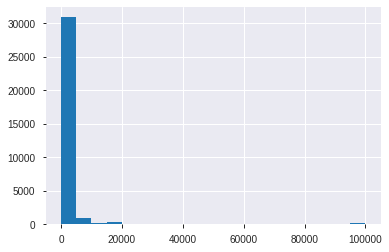

In [0]:
%matplotlib inline
df['capital_gain'].hist(bins=20)

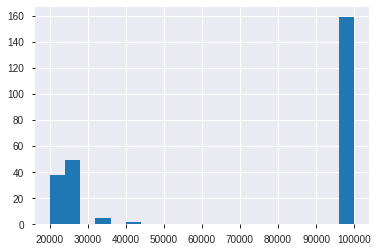

In [0]:
# Schrijf hier code om een histogram te maken van de capital_gain kolom voor waardes hoger dan 20000.
df['capital_gain'][df['capital_gain'] > 20000].hist(bins=20)

Er zijn verschillende opties om deze data geschikter te maken voor een machine learning opdracht. Denk aan het weglaten van de metingen of het mathematisch of handmatig transformeren van de metingen. Schrijf hier onder op wat je voorstel is om met deze waardes te doen. We zullen deze opdracht klassikaal bespreken.

In [0]:
# Ik zou de capital gain...

### 2.4 Ongebalanceerde data

Een goed voorbeeld van ongebalanceerde data is (niet geheel toevallig) te vinden in het label in ons dataframe. Bekijk met behulp van de documentatie van de value_counts() functie hoe scheef deze verdeling is:

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html

Het label, of target, wordt gebruikt om het algoritme te leren welk type inkomen hoort bij welke combinatie van eigenschappen. 

In [0]:
# Schrijf hier code om te bekijken hoe scheef de verdeling over labels is in onze dataset.
df['label'].value_counts(normalize=True)

 <=50K    0.75919
 >50K     0.24081
Name: label, dtype: float64

Zoals je ziet zijn er voor elke persoon met een inkomen hoger dan \$50.000, wel drie mensen met een inkomen lager dan dat. Door altijd een inkomen lager dan \$50.000 te voorspellen, zou een model dus al 76% van de tijd de juiste voorspelling doen. In deze sectie zullen we 1 methode verder onder de loep nemen: het samplen van de data. De overige methodes uit de presentatie komen later in de opdrachten of helemaal niet aan bod, maar kunnen soms ook nuttig zijn.

#### 2.4.1 Undersampling

Door alle waarnemingen uit de minderheidsklasse te kiezen en een gedeelte van de waarnemingen uit de meerderheidsklasse, kunnen we een gebalanceerde dataset creeeren. 

Met de pandas functie concat() kunnen we meerdere dataframes aan elkaar plakken:

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html

Probeer nu om alle waarnemingen waarbij het label '>50K' is in een nieuw dataframe genaamd df_balanced onder te brengen. Voeg daarbij een gelijk aantal waarnemingen waarbij het label '<=50K' is. De sample() functie kan daarbij nuttig zijn:

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html

Let er op dat er wat whitespace om de strings van de labels staat:

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.strip.html

In [0]:
# Schrijf hier code om een gebalanceerde dataset op te bouwen.
df_balanced_us = df[df['label'].str.strip() == '>50K']
df_balanced_us = pd.concat([df_balanced_us, df[df['label'].str.strip() == '<=50K'].sample(df_balanced_us.shape[0])], ignore_index=True)

#### 2.4.1 Oversampling

We kunnen hetzelfde principe gebruiken om de minderheidsklasse vaker te vertegenwoordigen in onze dataset. De sample() functie heeft een mogelijkheid tot samplen 'met terugleggen'. 

In [0]:
df_balanced_os = df[df['label'].str.strip() == '<=50K']
df_balanced_os = pd.concat([df_balanced_os, df[df['label'].str.strip() == '>50K'].sample(df_balanced_os.shape[0])], replace=True, ignore_index=True)

### 2.5 Transformaties

Om het verschil tussen standaardisatie en normalisatie duidelijk te maken, zullen we gestandaardiseerde en genormaliseerde versies van hours_per_week maken. Machine learning library sklearn heeft hier handige tools voor: StandardScaler (standaardisatie) en MinMaxScaler (normalisatie). Deze 'fitten' we eerst op de data, waarna we de scaler kunnen gebruiken om transformaties door te voeren.

In [0]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

standardscaler = StandardScaler()
standardscaler.fit(df['hours_per_week'].values.reshape(-1, 1))
df['hours_per_week_std'] = standardscaler.transform(df['hours_per_week'].values.reshape(-1, 1))

minmaxscaler = MinMaxScaler()
minmaxscaler.fit(df['hours_per_week'].values.reshape(-1, 1))
df['hours_per_week_nrm'] = minmaxscaler.transform(df['hours_per_week'].values.reshape(-1, 1))

df[['hours_per_week', 'hours_per_week_std', 'hours_per_week_nrm']].hist(bins=20)
df = df.drop(columns=['hours_per_week_std', 'hours_per_week_nrm'])

Probeer dit nu zelf voor de capital_gain en capital_loss kolommen.

In [0]:
# Schrijf hier code om de capital_gain en capital_loss kolommen te transformeren. Kies de variant die jou het nuttigst lijkt.


Het omzetten van categorische variabelen naar mathematisch bewerkbare varianten kunnen we doen met de get_dummies() functie van pandas:

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html

Een relatief nieuw maar zeer belangrijk argument voor deze functie is 'drop_first'.

Laten we eerst bekijken voor welke kolommen deze operatie nodig is.

In [0]:
# Schrijf hier code om te bekijken welke kolommen categorische waarden hebben. 
# Sla de namen van de categorische kolommen op in een variabele categorical_column.
# Sla ook de namen van de overige kolommen op ine en aparte variabele genaamd numerical_column.
categorical_column = [col for col in df.columns if df[col].dtype == 'object']
numerical_column = [col for col in df.columns if col not in categorical_column]

In [0]:
# Schrijf hier code om voor alle categorische kolommen de dummykolommen aan te maken en toe 
# te voegen aan een nieuw dataframe genaamd df_onehot. Verwijder de originele kolommen uit het dataframe.
df_onehot = pd.get_dummies(df, columns=categorical_column, drop_first=True)

### 2.6 Bonus: Trainset maken

Met het afronden van alle bovenstaande stappen, wordt het tijd om de trainset op te bouwen. Maak een dataframe waarin:

 * uitschieters op een zinnige manier verwerkt zijn
 * alle categorische variabelen one-hot encoded zijn
 * alle numerieke variabelen gestandaardiseerd zijn 
 * het label binair is en de naam 'label' heeft
 * even veel positieve als negatieve targets voorkomen


In [0]:
# Schrijf hier code om een trainset te maken.
to_standardise = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']
for col in to_standardise:
  standardscaler = StandardScaler()
  standardscaler.fit(df_onehot[col].values.reshape(-1, 1))
  df_onehot[col] = standardscaler.transform(df_onehot[col].values.reshape(-1, 1))

df_onehot.rename(columns={"label_ >50K": "label"}, inplace=True)

df_final = df_onehot[df_onehot['label'] == 1]
df_final = pd.concat([df_final, df_onehot[df_onehot['label'] == 0].sample(df_final.shape[0])], ignore_index=True)

from sklearn.utils import shuffle
df_final = shuffle(df_final)
df_final = df_final.reset_index(drop=True)
df_final.to_csv('train.csv')

## 3 Opzetten van een experiment en trainen van het model

Met een kant en klare trainset kunnen we aan de slag om het experiment voor te bereiden. Mocht je de bonusopdracht uit het vorige deel niet hebben afgerond, dan kun je de door ons voorbereide trainset zo binnenhalen:

In [0]:
!wget https://github.com/datamind-dotfit/machine_learning_python/blob/master/train.csv?raw=true -O train.csv
data = pd.read_csv('train.csv')
data = data.drop(data.columns[0], axis=1)

### 3.1 Opzetten van een experiment

Om een gedegen experiment te doen, bepalen we vooraf vijf zaken:



1.   Ons target (wat willen we voorspellen)
2.   De evaluatiemethode (hoe bepalen we hoe goed ons model presteert)
3.   De baselineprestatie (welke performance kunnen we minimaal verwachten)
4.   Een validatietechniek (hoe zorgen we dat we de performance eerlijk beoordelen)
5.   Test- en validatiedataset (hoe verdelen we onze waarnemingen over onze datasets)



#### 3.1.1 Target
We willen voorspellen of personen meer of minder dan \$50.000 per jaar verdienen. In ons dataframe heet deze kolom 'label'.

In [0]:
target = df['label']

#### 3.1.2 Evaluatiemethode

Om te bepalen hoe goed het model presteert, moeten we kwantificeren wat 'goed' betekent. In ons geval zijn we geinteresseerd in het correct classificeren van inkomen. Als eerste metric kunnen we daarvoor accuracy gebruiken. Andere mogelijk interessante metrics zijn precision, recall, de F1-score of de AUC.

In [0]:
from sklearn.metrics import accuracy_score

#### 3.1.3 Baselineprestatie

De eenvoudigste baselineprestatie is het voorspellen van de meerderheidsklasse. In dit geval voorspellen we dan 76% van de gevallen goed (<=50K per jaar). Met deze baseline kunnen we werken naar een elegantere oplossing, die vaker de juiste inkomensklasse voorspelt. Dat kan soms op basis van bijvoorbeeld business ruling, maar wij zullen daar een model voor maken.

In [0]:
# Meerderheidsklasse berekenen
majority_class = df['label'].value_counts().idxmax()
print(f"Majority class is {majority_class}")

# Accuracy berekenen
from sklearn.metrics import accuracy_score
df['baseline'] = majority_class
baseline_accuracy = accuracy_score(df['label'], df['baseline'])

print(f"Baseline accuracy is: {baseline_accuracy:.3f}")

#### 3.1.4 Validatietechniek
Het is belangrijk om de prestaties van een model op correcte wijze te evalueren. Trainen en testen op dezelfde data is niet toegestaan. Als je dit wel doet, loop je het risico dat je model niet heeft geleerd te generaliseren, wat wel het doel is van een model. 

Hoe we dit bepalen is door een validatie- en testset apart te houden tijdens de trainingsprocedure. Het trainen doen we op de trainset - simpel. Daarna proberen we op de validatieset uit of het model nog fijner geslepen kan worden. In de regel gaat het hier om optimaliseren van modelparameters. Op de testset wordt tot slot de performance bepaald om te zien hoe het model in de echte wereld zou presteren.

Om dit nog beter te beoordelen, wordt vaak K-fold cross validation gebruikt.

#### 3.1.5 Validatie- en testset maken
Een validatie- en testset maken kan met de hand of door gebruik te maken van de tools in sklearn. Een standaard ratio om data te verdelen is 80% train, 10% validatie en 10% test. 

Let er op dat je de data uniform verdeelt over deze sets. Je wilt bijvoorbeeld niet dat alle voorbeelden uit de eerste maand van je data in de trainset zitten, terwijl alle latere voorbeelden in je testset terecht komen. Ditzelfde geldt voor zaken als de verdeling van targets over de sets - een testset zonder positieve targets is niet representatief.

In [0]:
# Train / validatie / testsets maken
from sklearn.model_selection import train_test_split
train, val_test = train_test_split(data, train_size=0.8)
val, test = train_test_split(val_test, train_size=0.5)
print(train.shape, val.shape, test.shape)

## 3.2 Trainen van een model

Nu we onze data en het experiment hebben voorbereid, kunnen we modellen gaan trainen. We zullen twee algoritmes gebruiken: Logistische regressie en random forest.

### 3.2.1 Logistische regressie
Logistische regressie, in bepaalde kringen ook bekend als 'proc logistic', doet een aantal aannames over de onderliggende data. 

Vragen:

*   Welke aannames doet een logistische regressie over de onderliggende data?
*   In welke mate voldoet onze dataset daar aan?

Gebruik de logistische regressie module van sklearn om het volgende te doen:
 - importeren van de module
 - splitsen van de kolommen in de dataset in features en target
 - aanmaken van een LogisticRegression object
 - de trainset gebruiken om het regressiemodel te schatten

 Zoals altijd is de documentatie van cruciale waarde:

 https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html


In [0]:
# Schrijf hier code om de regressiemodule te importeren, kolommen in de dataset te splitsen, 
# het regressieobject aan te maken en te trainen op de trainset
from sklearn.linear_model import LogisticRegression
variables = data.drop('label', axis=1).columns
target = 'label'

reg = LogisticRegression()
reg.fit(X=train[variables], y=train[target])

### 3.2.2 Random forest

Een random forest is een collectie beslisbomen, die samen tot een voorspelling komen. Het 'random' deel in de naam random forest slaat op hoe er delen van bomen willekeurig worden geselecteerd. Omdat beslisbomen niet-lineaire verbanden goed kunnen voorspellen, kan het collectief dat ook. 

Vraag:

* In welke mate zijn de vereisten die door logistische regressie aan de data worden gesteld van toepassing bij gebruik van een random forest? 

Gebruik de random forest module van sklearn om het volgende te doen:
 - importeren van de module
 - aanmaken van een RandomForest object
 - de trainset gebruiken om het regressiemodel te schatten
 - berekenen van de accuracy van het model op de validatieset

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [0]:
# Schrijf hier code voor het maken en trainen van een random forest
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X=train[variables], y=train[target])

## 4 Testen van een model

We hebben nu twee getrainde modellen. We kunnen de performance vergelijken op basis van onze eerder gekozen performance metric. Daarnaast kunnen we K-fold cross validatie doen voor een nog accurater beeld van onze prestaties.

 Drie opdrachten:
 - bereken de logistiche regressie accuracy op de validatieset
 - bereken de random forest accuracy op de validatieset
 - neem de trainset en bereken de 5 fold cross validatie score (https://scikit-learn.org/stable/modules/cross_validation.html)


In [0]:
# Schrijf hier code om de accuracy van de logistische regressie te bepalen.
# Sla daarvoor de voorspellingen van het model op de validatieset op en vergelijk ze met de daadwerkelijke waardes.
y_hat = reg.predict(val[variables])
logistic_regression_accuracy = accuracy_score(val[target], y_hat)
print(f"Logistic regression accuracy is: {logistic_regression_accuracy:.3f}")

In [0]:
# Schrijf hier code voor het evalueren van de performance van het random forest
y_hat_rf = clf.predict(val[variables])
random_forest_accuracy = accuracy_score(val[target], y_hat_rf)
print(f"Random forest accuracy is: {random_forest_accuracy:.3f}")

In [0]:
# Schrijf hier code voor het berekenen van de 5 fold cross validatie score voor de twee modellen
from sklearn.model_selection import cross_val_score
mean_score_lg = cross_val_score(reg, train[variables], train[target], cv=5).mean()
mean_score_rf = cross_val_score(clf, train[variables], train[target], cv=5).mean()
print(f"Logistic regression 5 fold CV score is {mean_score_lg:.3f}")
print(f"Random forest 5 fold CV score is {mean_score_rf:.3f}")

Vragen:
* Hoe verhouden de 5 fold cross validation en de accuracy op de afzonderlijke modellen zich tot elkaar? Op welke sets worden ze berekend? 
* Welke maat is betrouwbaarder?
* Hoe verhouden de scores zich tot de baseline die we hebben vastgesteld?
* Welk model is beter?

## 5 Een model verbeteren

Het verbeteren van de performance van een model kan op verschillende manieren. Omdat het toevoegen van meer en betere data bijna altijd een verbetering oplevert in de performance, is dit zonder twijfel de meest gewenste oplossing. Helaas is dit vaak ook de minst makkelijk te realiseren oplossing. 

In ons geval is het onmogelijk om meer data te verkrijgen. Wel kunnen we experimenteren met andere algoritmes en nieuwe features uit de data creeeren. Vooral dat laatste is interessant als je de performance van een model wilt verbeteren. Hier komt vaak wel wat domeinkennis bij kijken, die niet altijd voorhanden is bij de data scientist zelf. 

### 5.1 Andere algoritmes

Het is interessant om met verschillende types algoritme te experimenteren. Soms zul je vinden dat een probleem erg geschikt is voor het gebruik van een lineaire voorspeller. In andere gevallen zijn de relaties tussen features en target niet-lineair en werkt een niet-lineaire voorspeller (zoals random forest of een deep learning aanpak) beter.

Boosting is een methode waarbij een set van voorspellers wordt gebruikt om tot een accurate voorspelling te komen. Aan de correct geclassificeerde samples van 1 voorspeller wordt een lager gewicht toegekend dan aan de incorrect geclassificeerde. Vervolgens wordt een nieuwe voorspeller getraind die beter is in het classificeren van de fouten van de eerste. Dit proces wordt een aantal keer herhaald, tot er een set van voorspellers is die samen een goede voorspelling kan maken. Het concept van boosting en een specifieke implementatie ervan, Xtreme Gradient Boosting, worden op dit moment erg veel gebruikt vanwege de goede performance. Niet alleen voorspellen modellen vaak erg goed, maar ook is het algoritme erg efficient waardoor je makkelijk en snel modellen kunt trainen.

Probeer nu met de GradientBoostingClassifier van sklearn (https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) of je betere performance kunt krijgen dan met onze eerder gemaakte modellen.

Schroom niet om verschillende instellingen van het algoritme te proberen. Het tunen van hyperparameters is een belangrijke methode om de performance van een model nog verder te verbeteren. 

In [0]:
# Schrijf hier code om een GradientBoostingClassifier te trainen en te evalueren.
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc.fit(X=train[variables], y=train[target])
y_hat_gbc = gbc.predict(val[variables])
gradient_boosting_accuracy = accuracy_score(val[target], y_hat_gbc)
print(f"Gradient Boosting accuracy is: {gradient_boosting_accuracy:.3f}")

### 5.2 Feature engineering

De meeste winst valt meestal te halen in het bewerken van de data tot nieuwe features. De domeinkennis die hiervoor nodig is maakt dit echter niet altijd triviaal. We zullen proberen om in onze dataset nieuwe, gecombineerde features te maken die tot betere voorspellingen leiden.

Om te beginnen is het een goed idee om te kijken welke features nu al belangrijk zijn in het model. Dit is eenvoudig te doen voor ons getrainde random forest model.

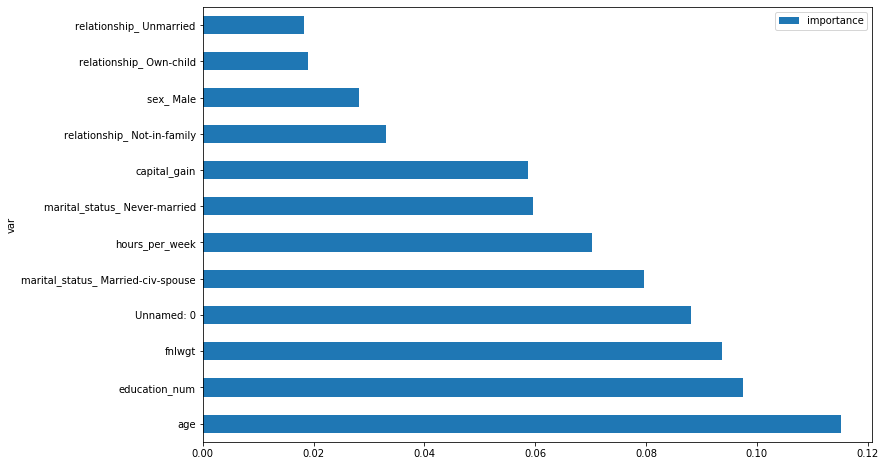

In [104]:
feature_importances = pd.DataFrame(data=list(zip(variables, clf.feature_importances_)), columns=['var', 'importance']).sort_values('importance', ascending=False)
feature_importances.set_index('var').nlargest(12, columns=['importance']).plot(kind='barh', figsize=(12,8))

Niet onverwacht zijn de leeftijd, opleiding, aantal personen in het huishouden en uren per week dat er wordt gewerkt belangrijk voor de voorspelling. Het is redelijk om aan te nemen dat het aantal uren dat iemand werkt gecombineerd met zijn opleidingsniveau, een correlatie heeft met zijn inkomen. We zullen dit testen door een samengestelde feature te maken uit deze twee features.

In [116]:
# Schrijf hier code om een nieuwe feature genaamd 'hpw_x_education' te maken, die wordt berekend door de hours per week te vermenigvuldigen met de education_num.
# Train daarna een model op deze nieuwe dataset en evalueer de performance.
data_fe = data.copy()
data_fe['hpw_x_education'] = data_fe['hours_per_week'] * data_fe['education_num']

train_fe, val_test_fe = train_test_split(data_fe, train_size=0.8)
val_fe, test_fe = train_test_split(val_test_fe, train_size=0.5)

variables_fe = data_fe.drop(['label', 'hours_per_week', 'education_num'], axis=1).columns

reg_fe = LogisticRegression()
reg_fe.fit(X=train_fe[variables_fe], y=train_fe[target])

y_hat_fe = reg_fe.predict(val_fe[variables_fe])
logistic_regression_accuracy_fe = accuracy_score(val_fe[target], y_hat_fe)
print(f"Logistic regression accuracy with feature engineering is: {logistic_regression_accuracy_fe:.3f}")

Logistic regression accuracy with feature engineering is: 0.832


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Vragen:

* Wat doe je met de originele features nadat je de nieuwe samengestelde feature hebt gemaakt?
* Moet je de nieuwe feature schalen?
* Hoe leuk was het om de hele dataset opnieuw te definieren en het voorspel- en evaluatieproces opnieuw te doorlopen?

Op de laatste vraag zullen we klassikaal terugkomen.